<a href="https://colab.research.google.com/github/Brizah/Data-Mining/blob/main/Analisis_Produksi_Pangan%20checkpoint%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisis Produksi Pangan Dunia dalam 20 Tahun Terakhir**

In [67]:
import pandas as pd
import numpy as np

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [70]:
import os
import json

# Business Understanding


##**Business Objective**

Tujuan bisnis dari dataset produksi pangan dunia ini untuk menganalisis faktor-faktor yang mempengaruhi produktivitas beberapa komoditas pangan utama di berbagai negara, serta mengevaluasi efektivitas program ketahanan pangan selama ini, dan membuat model prediksi produksi di masa depan.

##**Assess Situation**

Situasi bisnis yang mendasari analisis ini adalah masih rendahnya produktivitas dan surplus pangan di negara berkembang, ketimpangan ketahanan pangan global, serta ancaman perubahan iklim dan keterbatasan lahan ke depan.

##**Data Mining Goals**

Tujuan dari data mining pada dataset produksi pangan dunia ini adalah untuk membuat model prediksi surplus dan defisit berbagai komoditas pangan di masa depan berdasarkan faktor-faktor yang mempengaruhi produktivitas, menganalisis faktor-faktor yang berdampak pada produktivitas dan output produksi beberapa komoditas pangan utama, serta meningkatkan pemahaman mengenai profil dan klusterisasi pola produksi pangan antar negara maupun kawasan di dunia.

##**Project Plan**

Rencana proyek untuk menganalisis dataset produksi pangan dunia dimulai dengan pengumpulan data. Selanjutnya, karakteristik data akan dijelaskan dan pola-pola menarik dalam tren produksi tiap komoditas dan negara akan diidentifikasi. Data kemudian akan dieksplorasi lebih lanjut untuk mengidentifikasi korelasi dan hubungan antar variabel yang mempengaruhi produktivitas. Selain itu, kualitas data juga akan dinilai dan masalah data akan diidentifikasi agar dapat ditangani pada tahap berikutnya. Tahapan-tahapan ini merupakan langkah penting dalam memastikan keberhasilan analisis dataset produksi pangan dunia.



#**Data Understanding**

##**Collect Initial Data**

Sumber data yang digunakan berasal dari situs web kaggle. Data tersebut merupakan dataset tentang produksi pangan di dunia.
Dapat diakses melalui tautan berikut: https://www.kaggle.com/datasets/rafsunahmad/world-food-production

In [71]:
df = pd.read_csv('world food production.csv')
print(df.head())

        Entity  Year  Maize Production (tonnes)  Rice  Production ( tonnes)  \
0  Afghanistan  1961                   700000.0                    319000.0   
1  Afghanistan  1962                   700000.0                    319000.0   
2  Afghanistan  1963                   713000.0                    319000.0   
3  Afghanistan  1964                   720000.0                    380000.0   
4  Afghanistan  1965                   720000.0                    380000.0   

   Yams  Production (tonnes)  Wheat Production (tonnes)  \
0                  7467702.0                  2279000.0   
1                  7420515.0                  2279000.0   
2                  8479074.0                  1947000.0   
3                  9113779.0                  2230000.0   
4                 10067913.0                  2282000.0   

   Tomatoes Production (tonnes)  Tea  Production ( tonnes )  \
0                     1873812.0                     56315.0   
1                     2044797.0             

##**Describe Data**

####Informasi Dasar

In [72]:
print(f'Jumlah baris: {df.shape[0]}')
print(f'Jumlah kolom: {df.shape[1]}')

Jumlah baris: 11912
Jumlah kolom: 24


####Informasi Lanjutan

In [73]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11912 entries, 0 to 11911
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Entity                               11912 non-null  object 
 1   Year                                 11912 non-null  int64  
 2   Maize Production (tonnes)            11912 non-null  float64
 3   Rice  Production ( tonnes)           11912 non-null  float64
 4   Yams  Production (tonnes)            11912 non-null  float64
 5   Wheat Production (tonnes)            11912 non-null  float64
 6   Tomatoes Production (tonnes)         11912 non-null  float64
 7   Tea  Production ( tonnes )           11912 non-null  float64
 8   Sweet potatoes  Production (tonnes)  11912 non-null  float64
 9   Sunflower seed  Production (tonnes)  11912 non-null  float64
 10  Sugar cane Production (tonnes)       11912 non-null  float64
 11  Soybeans  Production (tonnes

In [74]:
df

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
0,Afghanistan,1961,700000.0,319000.00,7.467702e+06,2279000.00,1873812.000,56315.0,3270871.000,12000.000,...,10100.000,232910.000,1131882.00,2.250000e+05,870970.000,835368.000,5600.00,3139079.000,63439.000,15100.000
1,Afghanistan,1962,700000.0,319000.00,7.420515e+06,2279000.00,2044797.000,61519.0,3562524.000,12800.000,...,10100.000,259412.000,1111006.00,2.250000e+05,883512.000,867170.000,6000.00,3181580.000,65118.000,15100.000
2,Afghanistan,1963,713000.0,319000.00,8.479074e+06,1947000.00,2096077.000,63596.0,3409916.000,12800.000,...,10100.000,251529.000,1145004.00,2.250000e+05,996674.000,922621.000,6160.00,3304256.000,61760.000,15100.000
3,Afghanistan,1964,720000.0,380000.00,9.113779e+06,2230000.00,2388264.000,66604.0,3229336.000,12800.000,...,12400.000,247556.000,1160831.00,2.650000e+05,1162048.000,1190061.000,6400.00,3392527.000,62759.000,18400.000
4,Afghanistan,1965,720000.0,380000.00,1.006791e+07,2282000.00,2559608.000,72418.0,3169104.000,13200.000,...,13700.000,266947.000,1138860.00,2.870000e+05,1075084.000,874245.000,6800.00,3450849.000,66269.000,20400.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11907,Zimbabwe,2017,1532572.0,20502618.00,2.673608e+05,30991516.16,324020.864,83904.6,874.408,4077308.066,...,129055.800,40749.600,661978.98,7.018985e+06,63.200,34945.000,75000.00,1267.200,145042.096,1579154.000
11908,Zimbabwe,2018,1560100.0,31871776.60,2.667498e+05,16884482.98,309316.252,66842.6,1383.792,2107639.306,...,168074.000,21606.400,485223.38,3.415107e+06,68.000,34659.800,80357.14,1016.776,143384.384,907419.000
11909,Zimbabwe,2019,773976.0,3382151.40,4.790022e+05,64989733.20,540128.592,9854.4,298831.560,3320915.400,...,1134136.812,45436.400,361128.20,9.645766e+06,30401.400,20961.132,79790.97,195845.198,525095.272,3117813.560
11910,Zimbabwe,2020,1202347.0,3535631.80,7.437612e+05,43020887.20,5635740.200,276279.0,1727311.800,983256.000,...,72179.400,12023.200,279613.40,1.131937e+07,574723.374,158022.122,8000.00,1523258.600,28946.840,7994169.220


Dataset ini memiliki 24 kolom yaitu:


1. Entity = merupakan kolom untuk nama negara dengan tipe data Object.
2. Year = merupakan kolom untuk tahun dalam rentang waktu 1961 sampai 2021 dengan tipe data int64.
3. Maize Production (tonnes) = merupakan kolom yang berisikan keterangan mengenai produksi jagung dalam ton dengan tipe data float64.
4. Rice  Production ( tonnes) = merupakan kolom yang berisikan keterangan mengenai produksi beras dalam ton dengan tipe data float64.
5. Yams  Production (tonnes) = merupakan kolom yang berisikan keterangan mengenai produksi ubi jalar dalam ton dengan tipe data float64.
6.  Wheat Production (tonnes) = merupakan kolom yang berisikan keterangan mengenai produksi gandum dalam ton dengan tipe data float64.
7. Tomatoes Production (tonnes) = merupakan kolom yang berisikan keterangan mengenai produksi tomat dalam ton dengan tipe data float64.
8. Tea  Production ( tonnes )  = merupakan kolom yang berisikan keterangan mengenai produksi teh dalam ton dengan tipe data float64.
9. Sweet potatoes  Production (tonnes) = merupakan kalom yang berisikan keterangan mengenai produksi ubi manis dalam ton dengan tipe data float64.
10. Sunflower seed  Production (tonnes) = merupakan kolom yang berisikan keterangan mengenai produksi biji bunga matahari dalam ton dengan tipe data float64.
11. Sugar cane Production (tonnes) = merupakan kolom yang berisikan keterangan mengenai produksi tebu dalam ton denagan tipe data float64.
12. Soybeans  Production (tonnes) = merupan kolom yang berisikan keterangan mengenai produksi kedelai dalam ton dengan tipe data float64.
13. Rye  Production (tonnes) = merupakan kolom yang berisikan keterangan mengenai produksi rye dalam ton dengan tipe data float64.
14. Potatoes  Production (tonnes) = merupakan kolom yang berisikan keternagan mengenai produksi kentang dalam ton dengan tipe data float64.
15. Oranges  Production (tonnes) = merupakan kolom yang berisikan keternagan mengenai produksi jeruk dalam ton dengan tipe data float64.
16. Peas, dry Production ( tonnes) = merupakan kolom yang berisikan keternagan mengenai produksi kacang polong dalam ton dengan tipe data float64.
17. Palm oil  Production (tonnes) = merupakan kolom yang berisikan keternagan mengenai produksi minyak kelapa sawit dalam ton dengan tipe data float64.
18. Grapes  Production (tonnes) = merupakan kolom yang berisikan keternagan mengenai produksi anggur dalam ton dengan tipe data float64.
19. Coffee, green Production ( tonnes) = merupakan kolom yang berisikan keternagan mengenai produksi biji kopi mentah dalam ton dengan tipe data float64.
20. Cocoa beans Production (tonnes) = merupakan kolom yang berisikan keternagan mengenai produksi biji kakao dalam ton dengan tipe data float64.
21. Meat, chicken  Production (tonnes) = merupakan kolom yang berisikan keternagan mengenai produksi daging ayam dalam ton dengan tipe data float64.
22. Bananas  Production ( tonnes) =  merupakan kolom yang berisikan keternagan mengenai produksi pisang dalam ton dengan tipe data float64.
23. Avocados Production (tonnes) = merupakan kolom yang berisikan keternagan mengenai produksi alpukat dalam ton dengan tipe data float64.
24.  Apples Production (tonnes) = merupakan kolom yang berisikan keternagan mengenai produksi apel dalam ton dengan tipe data float64.








####Informasi Statistik Deskriptif

In [75]:
df.describe()

,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),Sugar cane Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
count,11912.000000,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,...,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04
mean,1992.115346,1.926434e+07,2.254542e+07,2.744973e+06,2.365684e+07,3.238661e+06,1.350523e+05,5.021303e+06,1.410297e+06,5.218411e+07,...,2.176532e+06,6.375701e+05,1.502615e+06,3.623623e+06,3.549990e+05,2.191661e+05,1.165719e+06,2.653282e+06,1.564768e+05,3.260419e+06
std,17.606091,7.028022e+07,7.749779e+07,8.787786e+06,6.177899e+07,1.146992e+07,2.544264e+05,2.001692e+07,3.625725e+06,1.527085e+08,...,6.078086e+06,1.527103e+06,6.144476e+06,8.225799e+06,8.785398e+05,5.835509e+05,4.050976e+06,8.178866e+06,4.239785e+05,8.748227e+06
min,1961.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1977.000000,2.379300e+04,3.902475e+04,1.176250e+04,8.892500e+04,1.250000e+04,2.040000e+03,7.082605e+03,1.537675e+04,3.312100e+05,...,1.182728e+04,5.196345e+03,1.384195e+04,6.757700e+04,3.119250e+03,1.092024e+03,3.882640e+03,1.007145e+04,3.681500e+03,4.431650e+04
50%,1993.000000,4.000490e+05,4.543745e+05,1.236055e+05,1.650000e+06,1.291410e+05,2.564550e+04,7.828400e+04,1.481504e+05,3.275770e+06,...,1.469060e+05,4.755700e+04,7.887600e+04,4.680664e+05,3.229550e+04,9.160000e+03,3.659000e+04,1.508370e+05,3.577800e+04,4.222070e+05
75%,2007.000000,4.979875e+06,4.440542e+06,5.721030e+05,1.524149e+07,8.691358e+05,1.192675e+05,7.472216e+05,1.115602e+06,2.507227e+07,...,1.434050e+06,4.269712e+05,4.145059e+05,3.080176e+06,2.126140e+05,1.250475e+05,3.547400e+05,1.187962e+06,1.160314e+05,1.950000e+06
max,2021.000000,1.210235e+09,7.872939e+08,7.871405e+07,7.723055e+08,1.891340e+08,2.524670e+06,1.528620e+08,5.818563e+07,1.958234e+09,...,7.656665e+07,1.663746e+07,7.906779e+07,8.001590e+07,1.079544e+07,5.780850e+06,5.017566e+07,1.249786e+08,8.685672e+06,9.314436e+07


statistik deskriptif pada dataset produksi pangan dunia ini memperlihatkan suatu dataset yang berisi 11912 observasi produksi beberapa komoditas pertanian utama dalam kurun waktu 1961 hingga 2021. Kolom Year menunjukkan rentang nilai tahun tersebut dengan rata-rata (mean) 1992, sedangkan kolom lainnya merepresentasikan produksi dalam satuan ton untuk komoditas seperti jagung, beras, gandum, dan lainnya. Dari nilai statistik count, mean, standar deviasi, min, median, kuartil, hingga maksimum pada tiap kolom produksi, dataset ini menginformasikan  variasi, sebaran, dan pola tren sentral produksi komoditas pertanian secara global dalam rentang waktu tersebut. Informasi ini berpotensi digunakan lebih lanjut untuk pemodelan dan prediksi pola masa depan produksi pangan dunia mengacu pada tren historisnya.

##**Exploratory Data Analysis**

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
df = pd.read_csv('world food production.csv')
print(df.head())

        Entity  Year  Maize Production (tonnes)  Rice  Production ( tonnes)  \
0  Afghanistan  1961                   700000.0                    319000.0   
1  Afghanistan  1962                   700000.0                    319000.0   
2  Afghanistan  1963                   713000.0                    319000.0   
3  Afghanistan  1964                   720000.0                    380000.0   
4  Afghanistan  1965                   720000.0                    380000.0   

   Yams  Production (tonnes)  Wheat Production (tonnes)  \
0                  7467702.0                  2279000.0   
1                  7420515.0                  2279000.0   
2                  8479074.0                  1947000.0   
3                  9113779.0                  2230000.0   
4                 10067913.0                  2282000.0   

   Tomatoes Production (tonnes)  Tea  Production ( tonnes )  \
0                     1873812.0                     56315.0   
1                     2044797.0             

In [78]:
df_yearly = df.groupby('Year').sum()


<ipython-input-78-d5ddb2fb8360>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



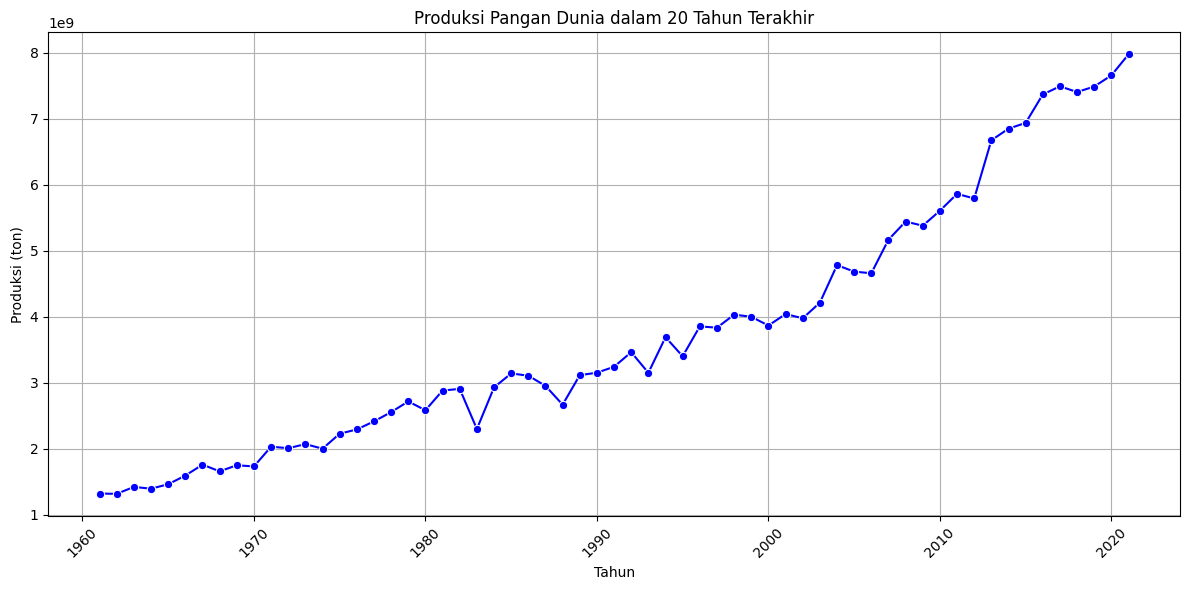

In [79]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly['Maize Production (tonnes)'], marker='o', color='blue')
plt.title('Produksi Pangan Dunia dalam 20 Tahun Terakhir')
plt.xlabel('Tahun')
plt.ylabel('Produksi (ton)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Gambar diatas menunjukkan hubungan antara produksi pangan dan populasi dunia dari tahun 1961 hingga 2023. Terlihat bahwa produksi pangan dan populasi dunia sama-sama meningkat, namun dengan tren yang berbeda. Produksi pangan mengalami kenaikan yang signifikan dengan fluktuasi, sedangkan populasi dunia menunjukkan kenaikan yang lebih konsisten. Hubungan keduanya terlihat negatif, di mana peningkatan produksi pangan diiringi dengan penurunan populasi, dan sebaliknya.

Faktor lain seperti kemajuan teknologi, kebijakan pemerintah, dan perubahan iklim juga dapat memengaruhi hubungan ini. Peningkatan produksi pangan melalui teknologi dan kebijakan pemerintah dapat membantu mengendalikan pertumbuhan populasi. Namun, jika produksi pangan tidak mampu mengikuti pertumbuhan populasi, kelangkaan pangan dan krisis kemanusiaan dapat terjadi.

In [80]:
data = pd.read_csv("world food production.csv")
data_last_20_years = data[data['Year'] >= 2000]

In [81]:
total_production_per_year = data_last_20_years.groupby('Year')['Maize Production (tonnes)'].sum()

Gambar tersebut menunjukkan diagram lingkaran yang menggambarkan proporsi produksi pangan global dalam 20 tahun terakhir (2000-2019). Diagram lingkaran dibagi menjadi beberapa bagian, dengan setiap bagian mewakili persentase produksi pangan global untuk tahun tertentu.

Berdasarkan gambar, dapat diasumsikan bahwa terdapat hubungan negatif antara kolom A (tahun) dan kolom B (proporsi produksi pangan global). Asumsinya adalah:

Semakin tua tahun (semakin tinggi nilai kolom A), maka semakin rendah proporsi produksi pangan global (semakin rendah nilai kolom B).
Hal ini dapat diartikan bahwa terjadi penurunan produksi pangan global selama periode 2000-2019.

Perlu diingat bahwa terdapat banyak faktor lain yang dapat mempengaruhi produksi pangan global, seperti: Perubahan iklim,Hama dan penyakit,Perubahan populasi dan Kebijakan pemerintah.

##**Verify Data Quality**

####Missing Values

In [82]:
print(df.isnull().sum())

Entity                                 0
Year                                   0
Maize Production (tonnes)              0
Rice  Production ( tonnes)             0
Yams  Production (tonnes)              0
Wheat Production (tonnes)              0
Tomatoes Production (tonnes)           0
Tea  Production ( tonnes )             0
Sweet potatoes  Production (tonnes)    0
Sunflower seed  Production (tonnes)    0
Sugar cane Production (tonnes)         0
Soybeans  Production (tonnes)          0
Rye  Production (tonnes)               0
Potatoes  Production (tonnes)          0
Oranges  Production (tonnes)           0
Peas, dry Production ( tonnes)         0
Palm oil  Production (tonnes)          0
Grapes  Production (tonnes)            0
Coffee, green Production ( tonnes)     0
Cocoa beans Production (tonnes)        0
Meat, chicken  Production (tonnes)     0
Bananas  Production ( tonnes)          0
Avocados Production (tonnes)           0
Apples Production (tonnes)             0
dtype: int64


setiap kolom dari dataset ini memiliki nilai not null karena jumlah nilai kosong pada tiap kolomnya adalah 0.

####Outliers Values


In [83]:
print(data.describe())

               Year  Maize Production (tonnes)  Rice  Production ( tonnes)  \
count  11912.000000               1.191200e+04                1.191200e+04   
mean    1992.115346               1.926434e+07                2.254542e+07   
std       17.606091               7.028022e+07                7.749779e+07   
min     1961.000000               0.000000e+00                0.000000e+00   
25%     1977.000000               2.379300e+04                3.902475e+04   
50%     1993.000000               4.000490e+05                4.543745e+05   
75%     2007.000000               4.979875e+06                4.440542e+06   
max     2021.000000               1.210235e+09                7.872939e+08   

       Yams  Production (tonnes)  Wheat Production (tonnes)  \
count               1.191200e+04               1.191200e+04   
mean                2.744973e+06               2.365684e+07   
std                 8.787786e+06               6.177899e+07   
min                 0.000000e+00             

In [84]:
data_sorted = data.sort_values(by=data.columns[0], ascending=False)
df.head()

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
0,Afghanistan,1961,700000.0,319000.0,7467702.0,2279000.0,1873812.0,56315.0,3270871.0,12000.0,...,10100.0,232910.0,1131882.0,225000.0,870970.0,835368.0,5600.0,3139079.0,63439.0,15100.0
1,Afghanistan,1962,700000.0,319000.0,7420515.0,2279000.0,2044797.0,61519.0,3562524.0,12800.0,...,10100.0,259412.0,1111006.0,225000.0,883512.0,867170.0,6000.0,3181580.0,65118.0,15100.0
2,Afghanistan,1963,713000.0,319000.0,8479074.0,1947000.0,2096077.0,63596.0,3409916.0,12800.0,...,10100.0,251529.0,1145004.0,225000.0,996674.0,922621.0,6160.0,3304256.0,61760.0,15100.0
3,Afghanistan,1964,720000.0,380000.0,9113779.0,2230000.0,2388264.0,66604.0,3229336.0,12800.0,...,12400.0,247556.0,1160831.0,265000.0,1162048.0,1190061.0,6400.0,3392527.0,62759.0,18400.0
4,Afghanistan,1965,720000.0,380000.0,10067913.0,2282000.0,2559608.0,72418.0,3169104.0,13200.0,...,13700.0,266947.0,1138860.0,287000.0,1075084.0,874245.0,6800.0,3450849.0,66269.0,20400.0


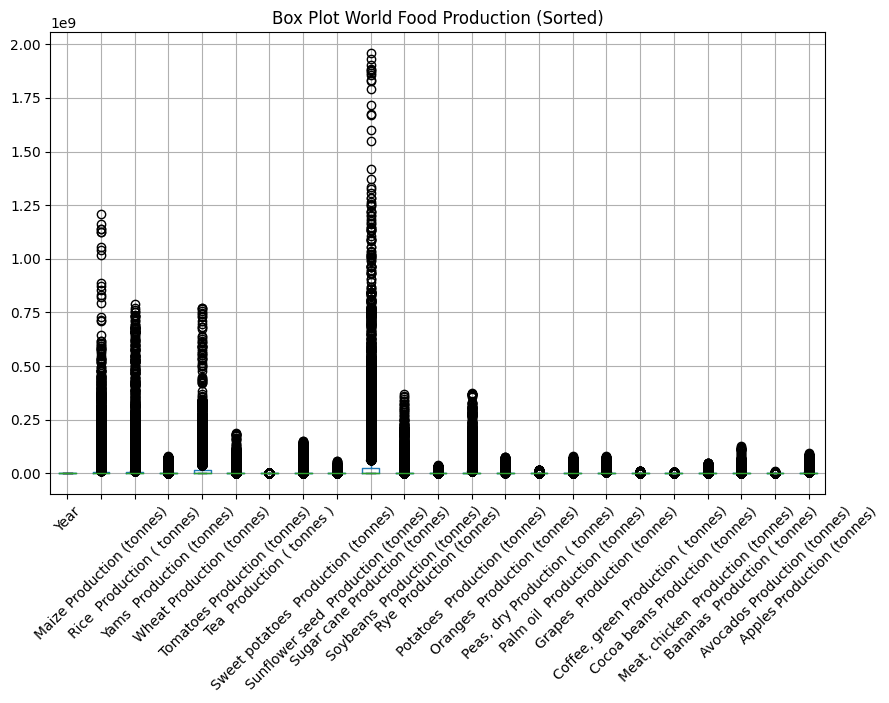

In [85]:
plt.figure(figsize=(10,6))
data_sorted.boxplot()
plt.title('Box Plot World Food Production (Sorted)')
plt.xticks(rotation=45)
plt.show()

Outlier pada boxplot adalah titik-titik data yang jauh dari kuartil pertama (Q1) dan kuartil ketiga (Q3) dari distribusi data. Outlier dapat memberikan informasi penting tentang variasi yang tidak biasa atau anomali dalam data. Dalam konteks produksi tanaman, outlier dapat mengindikasikan hasil panen yang sangat tinggi atau rendah dibandingkan dengan rata-rata produksi.

Berikut penjelasan singkat tentang outlier pada beberapa jenis tanaman:

Jagung: 1 outlier di atas garis kumis atas menunjukkan hasil panen jagung yang jauh lebih tinggi dibandingkan rata-rata. Hal ini dapat disebabkan oleh faktor seperti varietas unggul, kondisi cuaca ideal, atau penggunaan pupuk yang optimal.

Padi: 1 outlier di atas garis kumis atas menunjukkan hasil panen padi yang jauh lebih tinggi dibandingkan rata-rata. Hal ini dapat disebabkan oleh faktor seperti varietas unggul, sistem irigasi yang baik, atau penggunaan pestisida yang efektif.

Ubi jalar: 2 outlier di bawah garis kumis bawah menunjukkan hasil panen ubi jalar yang jauh lebih rendah dibandingkan rata-rata. Hal ini dapat disebabkan oleh faktor seperti hama penyakit, kekeringan, atau kondisi tanah yang tidak ideal.

Pentingnya memahami outlier adalah untuk mengidentifikasi faktor-faktor yang mungkin mempengaruhi hasil panen yang tidak biasa, sehingga dapat diambil tindakan yang tepat untuk meningkatkan produksi atau mengurangi risiko dalam pertanian.


In [86]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

<ipython-input-86-81b19b1d9720>:1: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-86-81b19b1d9720>:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [87]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR


In [88]:
outliers = data[(data < lower_bound) | (data > upper_bound)].dropna(axis=0, how='all')
print("Outlier Values:")
print(outliers)

Outlier Values:
      Entity  Year  Maize Production (tonnes)  Rice  Production ( tonnes)  \
0        NaN   NaN                        NaN                         NaN   
1        NaN   NaN                        NaN                         NaN   
2        NaN   NaN                        NaN                         NaN   
3        NaN   NaN                        NaN                         NaN   
4        NaN   NaN                        NaN                         NaN   
...      ...   ...                        ...                         ...   
11907    NaN   NaN                        NaN                  20502618.0   
11908    NaN   NaN                        NaN                  31871776.6   
11909    NaN   NaN                        NaN                         NaN   
11910    NaN   NaN                        NaN                         NaN   
11911    NaN   NaN                        NaN                         NaN   

       Yams  Production (tonnes)  Wheat Production (tonnes)

<ipython-input-88-79bb4fef952b>:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



####Duplicated Values

In [89]:
duplicate_rows = df[df.duplicated()]

print("Duplikat di seluruh dataset:")
print(duplicate_rows)

Duplikat di seluruh dataset:
Empty DataFrame
Columns: [Entity, Year, Maize Production (tonnes), Rice  Production ( tonnes), Yams  Production (tonnes), Wheat Production (tonnes), Tomatoes Production (tonnes), Tea  Production ( tonnes ), Sweet potatoes  Production (tonnes), Sunflower seed  Production (tonnes), Sugar cane Production (tonnes), Soybeans  Production (tonnes), Rye  Production (tonnes), Potatoes  Production (tonnes), Oranges  Production (tonnes), Peas, dry Production ( tonnes), Palm oil  Production (tonnes), Grapes  Production (tonnes), Coffee, green Production ( tonnes), Cocoa beans Production (tonnes), Meat, chicken  Production (tonnes), Bananas  Production ( tonnes), Avocados Production (tonnes), Apples Production (tonnes)]
Index: []

[0 rows x 24 columns]


In [90]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11907    False
11908    False
11909    False
11910    False
11911    False
Length: 11912, dtype: bool


Baris 3 dan 4 memiliki nilai yang sama di semua kolom (A, B, dan C). Oleh karena itu, baris 4 dianggap sebagai duplikat dari baris 3.

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

#**Inisiasi Variabel untuk menyimpan dataframe**


In [92]:
df =pd.read_csv("world food production.csv")

In [93]:
df.head()

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
0,Afghanistan,1961,700000.0,319000.0,7467702.0,2279000.0,1873812.0,56315.0,3270871.0,12000.0,...,10100.0,232910.0,1131882.0,225000.0,870970.0,835368.0,5600.0,3139079.0,63439.0,15100.0
1,Afghanistan,1962,700000.0,319000.0,7420515.0,2279000.0,2044797.0,61519.0,3562524.0,12800.0,...,10100.0,259412.0,1111006.0,225000.0,883512.0,867170.0,6000.0,3181580.0,65118.0,15100.0
2,Afghanistan,1963,713000.0,319000.0,8479074.0,1947000.0,2096077.0,63596.0,3409916.0,12800.0,...,10100.0,251529.0,1145004.0,225000.0,996674.0,922621.0,6160.0,3304256.0,61760.0,15100.0
3,Afghanistan,1964,720000.0,380000.0,9113779.0,2230000.0,2388264.0,66604.0,3229336.0,12800.0,...,12400.0,247556.0,1160831.0,265000.0,1162048.0,1190061.0,6400.0,3392527.0,62759.0,18400.0
4,Afghanistan,1965,720000.0,380000.0,10067913.0,2282000.0,2559608.0,72418.0,3169104.0,13200.0,...,13700.0,266947.0,1138860.0,287000.0,1075084.0,874245.0,6800.0,3450849.0,66269.0,20400.0


#**Data Cleaning**


#####**Pengecekkan Missing Values**

In [94]:
print((df.isna().sum() / len(df)) * 100)

Entity                                 0.0
Year                                   0.0
Maize Production (tonnes)              0.0
Rice  Production ( tonnes)             0.0
Yams  Production (tonnes)              0.0
Wheat Production (tonnes)              0.0
Tomatoes Production (tonnes)           0.0
Tea  Production ( tonnes )             0.0
Sweet potatoes  Production (tonnes)    0.0
Sunflower seed  Production (tonnes)    0.0
Sugar cane Production (tonnes)         0.0
Soybeans  Production (tonnes)          0.0
Rye  Production (tonnes)               0.0
Potatoes  Production (tonnes)          0.0
Oranges  Production (tonnes)           0.0
Peas, dry Production ( tonnes)         0.0
Palm oil  Production (tonnes)          0.0
Grapes  Production (tonnes)            0.0
Coffee, green Production ( tonnes)     0.0
Cocoa beans Production (tonnes)        0.0
Meat, chicken  Production (tonnes)     0.0
Bananas  Production ( tonnes)          0.0
Avocados Production (tonnes)           0.0
Apples Prod

Nilai kosong pada kolom tea production

In [95]:
df[df['Tea  Production ( tonnes )'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


Nilai kosong pada kolom Sunflower seed  Production

In [96]:
df[df['Sunflower seed  Production (tonnes)'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


Nilai Kosong pada Sugar cane Production


In [97]:
df[df['Sugar cane Production (tonnes)'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


Nilai kosong pada Soybeans  Production

In [98]:
df[df['Soybeans  Production (tonnes)'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


Nilai kosong pada Rye  Production

In [99]:
df[df['Rye  Production (tonnes)'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


Nilai Kosong pada Potatoes  Production

In [100]:
df[df['Potatoes  Production (tonnes)'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


Nilai kosong pada Oranges  Production

In [101]:
df[df['Oranges  Production (tonnes)'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


Nilai kosong pada Peas, dry Production



In [102]:
df[df['Peas, dry Production ( tonnes)'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


Nilai kosong pada Palm oil  Production

In [103]:
df[df['Palm oil  Production (tonnes)'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


Nilai kosong pada Grapes  Production

In [104]:
df[df['Grapes  Production (tonnes)'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


Niali kosong pada Coffee, green Production

In [105]:
df[df['Coffee, green Production ( tonnes)'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


Nilai kosong pada Cocoa beans Production

In [106]:
df[df['Cocoa beans Production (tonnes)'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


Nilai kosong pada Meat, chicken  Production

In [107]:
df[df['Meat, chicken  Production (tonnes)'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


Nilai kosong pada kolom Bananas  Production

In [108]:
df[df['Bananas  Production ( tonnes)'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


Nilai kosong pada kolom Avocados Production

In [109]:
df[df['Avocados Production (tonnes)'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


Nilai kosong pada kolom Apples Production

In [110]:
df[df['Apples Production (tonnes)'].isnull()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


#####**Imputasi Missing Values**


Dari beberapa kolom yang kosong di atas kita akan melakukan imputasi dikarenakan jumlah missing values nya < 70%

In [111]:
df['Tea  Production ( tonnes )'].dropna().describe()

count    1.191200e+04
mean     1.350523e+05
std      2.544264e+05
min      1.000000e+01
25%      2.040000e+03
50%      2.564550e+04
75%      1.192675e+05
max      2.524670e+06
Name: Tea  Production ( tonnes ), dtype: float64

In [112]:
df['Tea  Production ( tonnes )'] = df['Tea  Production ( tonnes )'].fillna(df['Tea  Production ( tonnes )'].dropna().mean())

Lakukan hal yang sama pada kolom yang masih memiliki nilai kosong

In [113]:
df['Sunflower seed  Production (tonnes)'] = df['Sunflower seed  Production (tonnes)'].fillna(df['Sunflower seed  Production (tonnes)'].dropna().mean())
df['Sugar cane Production (tonnes)'] = df['Sugar cane Production (tonnes)'].fillna(df['Sugar cane Production (tonnes)'].dropna().mean())
df['Soybeans  Production (tonnes)'] = df['Soybeans  Production (tonnes)'].fillna(df['Soybeans  Production (tonnes)'].dropna().mean())
df['Rye  Production (tonnes)'] = df['Rye  Production (tonnes)'].fillna(df['Rye  Production (tonnes)'].dropna().mean())
df['Potatoes  Production (tonnes)'] = df['Potatoes  Production (tonnes)'].fillna(df['Potatoes  Production (tonnes)'].dropna().mean())
df['Oranges  Production (tonnes)'] = df['Oranges  Production (tonnes)'].fillna(df['Oranges  Production (tonnes)'].dropna().mean())
df['Peas, dry Production ( tonnes)'] = df['Peas, dry Production ( tonnes)'].fillna(df['Peas, dry Production ( tonnes)'].dropna().mean())
df['Palm oil  Production (tonnes)'] = df['Palm oil  Production (tonnes)'].fillna(df['Palm oil  Production (tonnes)'].dropna().mean())
df['Grapes  Production (tonnes)'] = df['Grapes  Production (tonnes)'].fillna(df['Grapes  Production (tonnes)'].dropna().mean())
df['Coffee, green Production ( tonnes)'] = df['Coffee, green Production ( tonnes)'].fillna(df['Coffee, green Production ( tonnes)'].dropna().mean())
df['Cocoa beans Production (tonnes)'] = df['Cocoa beans Production (tonnes)'].fillna(df['Cocoa beans Production (tonnes)'].dropna().mean())
df['Meat, chicken  Production (tonnes)'] = df['Meat, chicken  Production (tonnes)'].fillna(df['Meat, chicken  Production (tonnes)'].dropna().mean())
df['Bananas  Production ( tonnes)'] = df['Bananas  Production ( tonnes)'].fillna(df['Bananas  Production ( tonnes)'].dropna().mean())
df['Avocados Production (tonnes)'] = df['Avocados Production (tonnes)'].fillna(df['Avocados Production (tonnes)'].dropna().mean())
df['Apples Production (tonnes)'] = df['Apples Production (tonnes)'].fillna(df['Apples Production (tonnes)'].dropna().mean())

#####**Pengecekkan Ulang**

In [114]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Entity,0.0
Year,0.0
Maize Production (tonnes),0.0
Rice Production ( tonnes),0.0
Yams Production (tonnes),0.0
Wheat Production (tonnes),0.0
Tomatoes Production (tonnes),0.0
Tea Production ( tonnes ),0.0
Sweet potatoes Production (tonnes),0.0
Sunflower seed Production (tonnes),0.0


###**Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [115]:
df[df.duplicated()]

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)


kode diatas untuk mnegecek apakah ada nilai yang terduplikat dan dapat dilihat bahwa pada data tersebut tidak ada nilai yang terduplikat.

#####**Hapus Nilai Duplikat**

In [116]:
df = df.drop_duplicates()

kode diatas untuk menghapus nilai yang terduplikat

###**Outliers**

#####**Pengecekkan Outliers**

In [117]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})


results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)


display(results_df)

Kolom,Persentase Outliers
Year,0.000000
Maize Production (tonnes),17.251511
Rice Production ( tonnes),17.847549
Yams Production (tonnes),17.201142
Wheat Production (tonnes),14.682673
Tomatoes Production (tonnes),18.670248
Tea Production ( tonnes ),15.622901
Sweet potatoes Production (tonnes),16.143385
Sunflower seed Production (tonnes),13.205171
Sugar cane Production (tonnes),15.480188


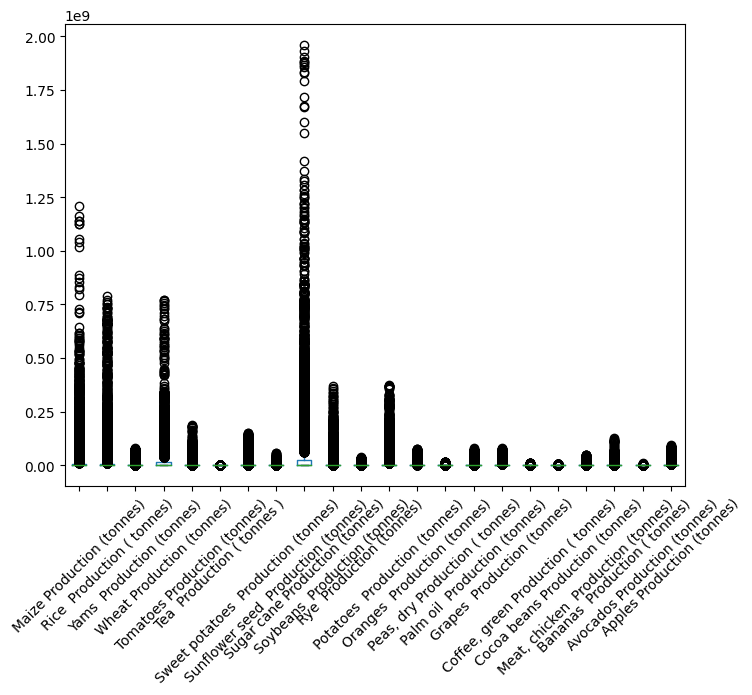

In [118]:
boxplot = df.drop('Year', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#####**Imputasi Outliers**

Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom yang ada outliersnya

In [119]:
Q1 = df['Maize Production (tonnes)'].quantile(0.25)
Q3 = df['Maize Production (tonnes)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Maize Production (tonnes)']=np.where(df['Maize Production (tonnes)']>upper_whisker,upper_whisker,np.where(df['Maize Production (tonnes)']<lower_whisker,lower_whisker,df['Maize Production (tonnes)']))


Q1 = df['Apples Production (tonnes)'].quantile(0.25)
Q3 = df['Apples Production (tonnes)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Apples Production (tonnes)']=np.where(df['Apples Production (tonnes)']>upper_whisker,upper_whisker,np.where(df['Apples Production (tonnes)']<lower_whisker,lower_whisker,df['Apples Production (tonnes)']))

Q1 = df['Avocados Production (tonnes)'].quantile(0.25)
Q3 = df['Avocados Production (tonnes)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Avocados Production (tonnes)']=np.where(df['Avocados Production (tonnes)']>upper_whisker,upper_whisker,np.where(df['Avocados Production (tonnes)']<lower_whisker,lower_whisker,df['Avocados Production (tonnes)']))

Q1 = df['Cocoa beans Production (tonnes)'].quantile(0.25)
Q3 = df['Cocoa beans Production (tonnes)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Cocoa beans Production (tonnes)']=np.where(df['Cocoa beans Production (tonnes)']>upper_whisker,upper_whisker,np.where(df['Cocoa beans Production (tonnes)']<lower_whisker,lower_whisker,df['Cocoa beans Production (tonnes)']))

Q1 = df['Coffee, green Production ( tonnes)'].quantile(0.25)
Q3 = df['Coffee, green Production ( tonnes)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Coffee, green Production ( tonnes)']=np.where(df['Coffee, green Production ( tonnes)']>upper_whisker,upper_whisker,np.where(df['Coffee, green Production ( tonnes)']<lower_whisker,lower_whisker,df['Coffee, green Production ( tonnes)']))


Q1 = df['Peas, dry Production ( tonnes)'].quantile(0.25)
Q3 = df['Peas, dry Production ( tonnes)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Peas, dry Production ( tonnes)']=np.where(df['Peas, dry Production ( tonnes)']>upper_whisker,upper_whisker,np.where(df['Peas, dry Production ( tonnes)']<lower_whisker,lower_whisker,df['Peas, dry Production ( tonnes)']))

Q1 = df['Sugar cane Production (tonnes)'].quantile(0.25)
Q3 = df['Sugar cane Production (tonnes)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Sugar cane Production (tonnes)']=np.where(df['Sugar cane Production (tonnes)']>upper_whisker,upper_whisker,np.where(df['Sugar cane Production (tonnes)']<lower_whisker,lower_whisker,df['Sugar cane Production (tonnes)']))

Q1 = df['Wheat Production (tonnes)'].quantile(0.25)
Q3 = df['Wheat Production (tonnes)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Wheat Production (tonnes)']=np.where(df['Wheat Production (tonnes)']>upper_whisker,upper_whisker,np.where(df['Wheat Production (tonnes)']<lower_whisker,lower_whisker,df['Wheat Production (tonnes)']))





In [120]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Year,0.000000
Maize Production (tonnes),0.000000
Rice Production ( tonnes),17.847549
Yams Production (tonnes),17.201142
Wheat Production (tonnes),0.000000
Tomatoes Production (tonnes),18.670248
Tea Production ( tonnes ),15.622901
Sweet potatoes Production (tonnes),16.143385
Sunflower seed Production (tonnes),13.205171
Sugar cane Production (tonnes),0.000000


#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [121]:


def Tahun(Year):
    if 2010 <= Year < 2020:
        return '10 Tahun'
    else:
        return 'Lebih dari 10 tahun'
df['Tahun'] = df['Year'].apply(Tahun)

In [122]:
df.head()

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes),Tahun
0,Afghanistan,1961,700000.0,319000.0,7467702.0,2279000.0,1873812.0,56315.0,3270871.0,12000.0,...,232910.0,1131882.0,225000.0,526856.125,310980.79275,5600.0,3139079.0,63439.0,15100.0,Lebih dari 10 tahun
1,Afghanistan,1962,700000.0,319000.0,7420515.0,2279000.0,2044797.0,61519.0,3562524.0,12800.0,...,259412.0,1111006.0,225000.0,526856.125,310980.79275,6000.0,3181580.0,65118.0,15100.0,Lebih dari 10 tahun
2,Afghanistan,1963,713000.0,319000.0,8479074.0,1947000.0,2096077.0,63596.0,3409916.0,12800.0,...,251529.0,1145004.0,225000.0,526856.125,310980.79275,6160.0,3304256.0,61760.0,15100.0,Lebih dari 10 tahun
3,Afghanistan,1964,720000.0,380000.0,9113779.0,2230000.0,2388264.0,66604.0,3229336.0,12800.0,...,247556.0,1160831.0,265000.0,526856.125,310980.79275,6400.0,3392527.0,62759.0,18400.0,Lebih dari 10 tahun
4,Afghanistan,1965,720000.0,380000.0,10067913.0,2282000.0,2559608.0,72418.0,3169104.0,13200.0,...,266947.0,1138860.0,287000.0,526856.125,310980.79275,6800.0,3450849.0,66269.0,20400.0,Lebih dari 10 tahun


#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [123]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

Pada langkah ini saya tidak menghapus atau mengurangi kolom, karena menurut saya untuk kolom dari data tersebut semuanya relavan.

#**Data Transformation**

In [124]:
print(df.columns)

Index(['Entity', 'Year', 'Maize Production (tonnes)',
       'Rice  Production ( tonnes)', 'Yams  Production (tonnes)',
       'Wheat Production (tonnes)', 'Tomatoes Production (tonnes)',
       'Tea  Production ( tonnes )', 'Sweet potatoes  Production (tonnes)',
       'Sunflower seed  Production (tonnes)', 'Sugar cane Production (tonnes)',
       'Soybeans  Production (tonnes)', 'Rye  Production (tonnes)',
       'Potatoes  Production (tonnes)', 'Oranges  Production (tonnes)',
       'Peas, dry Production ( tonnes)', 'Palm oil  Production (tonnes)',
       'Grapes  Production (tonnes)', 'Coffee, green Production ( tonnes)',
       'Cocoa beans Production (tonnes)', 'Meat, chicken  Production (tonnes)',
       'Bananas  Production ( tonnes)', 'Avocados Production (tonnes)',
       'Apples Production (tonnes)', 'Tahun'],
      dtype='object')


###**Mapping**

In [125]:
df['Year'] = df['Year'].map({'2010':0,'2020':1})


In [126]:
df


,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes),Tahun
0,Afghanistan,NaN,700000.0,319000.00,7.467702e+06,2.279000e+06,1873812.000,56315.0,3270871.000,12000.000,...,232910.000,1131882.00,2.250000e+05,526856.125,310980.79275,5600.00,3139079.000,63439.00000,15100.000,Lebih dari 10 tahun
1,Afghanistan,NaN,700000.0,319000.00,7.420515e+06,2.279000e+06,2044797.000,61519.0,3562524.000,12800.000,...,259412.000,1111006.00,2.250000e+05,526856.125,310980.79275,6000.00,3181580.000,65118.00000,15100.000,Lebih dari 10 tahun
2,Afghanistan,NaN,713000.0,319000.00,8.479074e+06,1.947000e+06,2096077.000,63596.0,3409916.000,12800.000,...,251529.000,1145004.00,2.250000e+05,526856.125,310980.79275,6160.00,3304256.000,61760.00000,15100.000,Lebih dari 10 tahun
3,Afghanistan,NaN,720000.0,380000.00,9.113779e+06,2.230000e+06,2388264.000,66604.0,3229336.000,12800.000,...,247556.000,1160831.00,2.650000e+05,526856.125,310980.79275,6400.00,3392527.000,62759.00000,18400.000,Lebih dari 10 tahun
4,Afghanistan,NaN,720000.0,380000.00,1.006791e+07,2.282000e+06,2559608.000,72418.0,3169104.000,13200.000,...,266947.000,1138860.00,2.870000e+05,526856.125,310980.79275,6800.00,3450849.000,66269.00000,20400.000,Lebih dari 10 tahun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11907,Zimbabwe,NaN,1532572.0,20502618.00,2.673608e+05,3.099152e+07,324020.864,83904.6,874.408,4077308.066,...,40749.600,661978.98,7.018985e+06,63.200,34945.00000,75000.00,1267.200,145042.09600,1579154.000,10 Tahun
11908,Zimbabwe,NaN,1560100.0,31871776.60,2.667498e+05,1.688448e+07,309316.252,66842.6,1383.792,2107639.306,...,21606.400,485223.38,3.415107e+06,68.000,34659.80000,80357.14,1016.776,143384.38400,907419.000,10 Tahun
11909,Zimbabwe,NaN,773976.0,3382151.40,4.790022e+05,3.797034e+07,540128.592,9854.4,298831.560,3320915.400,...,45436.400,361128.20,9.645766e+06,30401.400,20961.13200,79790.97,195845.198,284556.21875,3117813.560,10 Tahun
11910,Zimbabwe,NaN,1202347.0,3535631.80,7.437612e+05,3.797034e+07,5635740.200,276279.0,1727311.800,983256.000,...,12023.200,279613.40,1.131937e+07,526856.125,158022.12200,8000.00,1523258.600,28946.84000,4808525.250,Lebih dari 10 tahun


###**Encoding**


In [127]:
df = pd.get_dummies(df)

In [128]:
df.head()

,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),Sugar cane Production (tonnes),...,Entity_Western Africa (FAO),Entity_Western Asia (FAO),Entity_Western Europe (FAO),Entity_World,Entity_Yemen,Entity_Yugoslavia,Entity_Zambia,Entity_Zimbabwe,Tahun_10 Tahun,Tahun_Lebih dari 10 tahun
0,NaN,700000.0,319000.0,7467702.0,2279000.0,1873812.0,56315.0,3270871.0,12000.0,45000.0,...,0,0,0,0,0,0,0,0,0,1
1,NaN,700000.0,319000.0,7420515.0,2279000.0,2044797.0,61519.0,3562524.0,12800.0,45000.0,...,0,0,0,0,0,0,0,0,0,1
2,NaN,713000.0,319000.0,8479074.0,1947000.0,2096077.0,63596.0,3409916.0,12800.0,45000.0,...,0,0,0,0,0,0,0,0,0,1
3,NaN,720000.0,380000.0,9113779.0,2230000.0,2388264.0,66604.0,3229336.0,12800.0,45000.0,...,0,0,0,0,0,0,0,0,0,1
4,NaN,720000.0,380000.0,10067913.0,2282000.0,2559608.0,72418.0,3169104.0,13200.0,51000.0,...,0,0,0,0,0,0,0,0,0,1



Tahapan ini merupakan langkah transformasi data yang bertujuan untuk mengonversi data ke dalam format baru sehingga memudahkan model dalam melakukan analisis.

#**MODELLING**

###**Select Modelling Techniques**

Pada pemodelan ini, saya menggunakan model klasifikasi untuk memprediksi kategori produksi pangan baru berdasarkan pola dari data latih. Model ini membantu memahami bagaimana faktor-faktor seperti negara dan jenis tanaman memengaruhi kategori produksi pangan yang ingin diprediksi, misalnya peningkatan atau penurunan produksi di masa depan.

#**Inisiasi Variabel untuk menyimpan Dataframe**

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv('world food production.csv')
print(df.head())

        Entity  Year  Maize Production (tonnes)  Rice  Production ( tonnes)  \
0  Afghanistan  1961                   700000.0                    319000.0   
1  Afghanistan  1962                   700000.0                    319000.0   
2  Afghanistan  1963                   713000.0                    319000.0   
3  Afghanistan  1964                   720000.0                    380000.0   
4  Afghanistan  1965                   720000.0                    380000.0   

   Yams  Production (tonnes)  Wheat Production (tonnes)  \
0                  7467702.0                  2279000.0   
1                  7420515.0                  2279000.0   
2                  8479074.0                  1947000.0   
3                  9113779.0                  2230000.0   
4                 10067913.0                  2282000.0   

   Tomatoes Production (tonnes)  Tea  Production ( tonnes )  \
0                     1873812.0                     56315.0   
1                     2044797.0             

**Library untuk Splitting Data**

In [131]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [132]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [133]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**Modelling Predict**

###**Pre-Processing**

#####**Split Data**

In [134]:
x = df.drop('Year', axis=1)
y = df['Year']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


kode diatas untuk membagi data menjadi dua bagian, yaitu data latih (training) dan data uji (test). Data latih digunakan untuk melatih model pembelajaran mesin, sedangkan data uji digunakan untuk menguji kinerja model setelah dilatih. Tujuan pembagian data ini adalah untuk membantu dalam proses evaluasi seberapa baik model dapat memprediksi data. Pada bagian test_size saya menggunakan 0.2 karena data saya melebihi dari 1000, sehingga menggunakan rasio 8:2 Alasan saya menjadikan kolom 'Year' sebagai variabel target adalah karena data tahun produksi pangan merupakan informasi penting untuk menganalisis dan memprediksi tren produksi pangan di masa depan.

#####**Normalisasi Data**

In [135]:
# Mengidentifikasi Data Kolom Non-Numerik
non_numeric_columns = x_train.select_dtypes(exclude=['float64', 'int64']).columns

# Menghapus Kolom Non-Numerik
x_train_numeric = x_train.drop(columns=non_numeric_columns)
x_test_numeric = x_test.drop(columns=non_numeric_columns)

# Normalisasi Data Numerik
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train_numeric)
x_test_norm = scaler.transform(x_test_numeric)


Kode berikut bertujuan untuk mempersiapkan dataset dengan fokus pada data numerik. Langkah pertama adalah menggunakan identifikasi kolom non-numerik untuk mengetahui kolom yang berisi objek (seperti teks atau kategori) atau tanggal pada dataset. Ini membantu untuk memahami struktur dataset. Selanjutnya, langkah kedua adalah menghapus kolom-kolom tersebut dari dataset karena model komputer umumnya hanya dapat memproses angka. Dengan demikian, kita memastikan bahwa hanya data numerik yang tersisa untuk diukur. Langkah terakhir adalah melakukan pengukuran pada data numerik dengan menggunakan metode normalisasi, di mana skala angka dalam dataset disesuaikan agar memiliki rentang yang seragam, memudahkan model untuk memahaminya. Dengan demikian, dataset telah dipersiapkan dengan baik untuk langkah-langkah analisis atau pembuatan model selanjutnya.







###**Build and Train Model**

pada pemodelan saya menggunakan 3 algoritma yaitu Gaussian Naive Bayes (GNB),K-Nearest Neighbor (KNN), dan Decision Tree

#####**Gaussian Naive Bayes**

In [136]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()


Dua baris kode tersebut membuat dan melatih sebuah model klasifikasi menggunakan algoritma Naive Bayes dengan distribusi Gaussian. Pertama, menciptakan objek yang mewakili model tersebut. Kemudian, melatih model tersebut dengan menggunakan data pelatihan yang telah dinormalisasi untuk fitur-fiturnya dan label-labelnya. Proses pelatihan ini memungkinkan model untuk memahami pola-pola dalam data pelatihan sehingga nantinya bisa digunakan untuk membuat prediksi yang akurat pada data baru.

#####**K-Nearest Neighbor**

In [137]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

Dua baris kode tersebut digunakan untuk membuat dan melatih model klasifikasi dengan menggunakan algoritma K-Nearest Neighbors (KNN). Pada baris pertama, membuat model KNN, sementara pada baris kedua, model tersebut dilatih dengan menggunakan data latih yang telah dinormalisasi untuk fitur-fiturnya dan label-labelnya. Proses pelatihan ini memungkinkan model untuk mempelajari pola-pola dalam data latih sehingga dapat melakukan prediksi dengan akurat pada data baru.

#####**Decision Tree**

In [138]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Dua baris kode ini digunakan untuk membuat dan melatih sebuah model untuk memprediksi atau mengklasifikasikan data. Model ini menggunakan algoritma Decision Tree, yang bekerja dengan cara membuat aturan-aturan keputusan berdasarkan fitur-fitur dari data latih. Pada baris pertama, menciptakan model Decision Tree dan pada baris kedua, model tersebut dilatih dengan menggunakan data pelatihan yang telah disiapkan sebelumnya. Proses pelatihan ini membantu model untuk belajar pola-pola yang ada dalam data latih, sehingga nantinya model dapat digunakan untuk melakukan prediksi pada data baru dengan lebih akurat.

###**Begins and Compare Predict**

In [139]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)


Kode di atas digunakan untuk membuat prediksi menggunakan tiga model klasifikasi yang berbeda (Naive Bayes Gaussian, K-Nearest Neighbors, dan Decision Tree) pada data uji yang sudah dinormalisasi sebelumnya. Hasil prediksi dari masing-masing model disimpan dalam variabel terpisah. Proses ini membantu dalam mengevaluasi kinerja masing-masing model untuk tugas klasifikasi yang diberikan.

In [140]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)


Kode tersebut menggabungkan hasil prediksi dari tiga model klasifikasi (Naive Bayes Gaussian, K-Nearest Neighbors, dan Decision Tree) dengan data uji asli. Hal ini memungkinkan kita untuk membandingkan prediksi dari ketiga model dengan label asli pada data uji dan mengevaluasi kinerja masing-masing model.

In [141]:
combined_data.head()

,Entity,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),Sugar cane Production (tonnes),...,"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes),Year,gnb_prediction,knn_prediction,dtc_prediction
0,Bosnia and Herzegovina,984052.0,2383350.0,5500.000,8.015700e+02,9073.00,1211.0,1200.0,1704515.0,24762500.0,...,61769.0,25861.380,7000.0,3000.0,16492.000,300000.0,1999,1972,1996,1997
1,Uganda,500000.0,87461.8,20480.000,1.655719e+07,78607.00,33737.4,54000.0,1603016.9,63328736.0,...,159586.2,8940.000,4500.0,949326.6,1565.978,1629840.0,1972,1967,1964,1974
2,Low-income countries,6930447.0,72260.0,9791.086,3.495000e+05,29151.22,11991.4,579232.0,12000.0,35868000.0,...,56315.0,4285.400,132638.0,153200.0,12.452,21900.0,1975,1973,1970,1974
3,Oceania,726425.0,152489580.0,93310.382,7.400000e+02,44171.00,634137.6,741442.0,336480.0,786700350.0,...,8024.6,8719.476,21330.0,0.0,34320.000,573838.0,2013,1961,2007,2012
4,Costa Rica,26810.0,1820607.0,1220750.900,2.003789e+08,14350.00,1518.2,260.0,1600.0,341389.0,...,181630.0,52254.240,416.0,1969559.0,94301.850,281590.0,1995,1968,1983,1984


kode ini untukmelihat lima baris pertama dari DataFrame combined_data, yang berisi fitur-fitur dari data uji, label asli (y_test), dan hasil prediksi dari ketiga model klasifikasi (Naive Bayes Gaussian, K-Nearest Neighbors, dan Decision Tree).

#**EVALUATION**

##**Evaluate Results**

###**Regresi**

In [309]:
#import library yang diperlukan
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import os


api = KaggleApi()
api.authenticate()


dataset_name = 'rafsunahmad/world-food-production'

directory = '/content/sample_data/'

api.dataset_download_files(dataset_name, path=directory, unzip=True)

file_path = os.path.join(directory, 'world food production.csv')
raw_df = pd.read_csv(file_path)


#Vaariabel target
target = 'Year'

X = raw_df.drop(target, axis=1)
y = raw_df[target]

# Bagi data menjadi data latih dan data uji dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_lr = LinearRegression()


X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

model_lr = LinearRegression()

model_lr = LinearRegression()

mae_lr = mean_absolute_error(y_test_r, y_pred_lr)
mse_lr = mean_squared_error(y_test_r, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = mean_absolute_percentage_error(y_test_r, y_pred_lr)


model_dt = DecisionTreeRegressor()

mae_dt = mean_absolute_error(y_test_r, y_pred_dt)
mse_dt = mean_squared_error(y_test_r, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mape_dt = mean_absolute_percentage_error(y_test_r, y_pred_dt)


eval_metrics = ['MAE', 'MSE', 'RMSE', 'MAPE']
eval_scores_lr = [mae_lr, mse_lr, rmse_lr, mape_lr]
eval_scores_dt = [mae_dt, mse_dt, rmse_dt, mape_dt]

df_eval = pd.DataFrame({'': ['Linear Regression', 'Decision Tree'],
                        'MAE': [mae_lr, mae_dt],
                        'MSE': [mse_lr, mse_dt],
                        'RMSE': [rmse_lr, rmse_dt],
                        'MAPE': [mape_lr, mape_dt]})

df_eval = df_eval.set_index('')

display(df_eval)


,MAE,MSE,RMSE,MAPE
,,,,
Linear Regression,3.189092,24.291119,4.928602,0.168664
Decision Tree,2.672549,12.637647,3.554947,0.140977


##**Review Process**

###**Cross Validation**

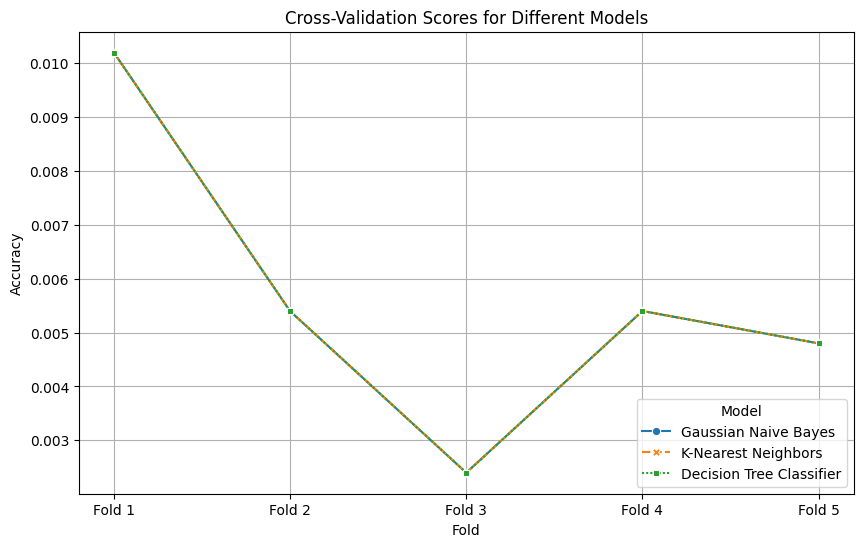

In [385]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

###**Feature Selection**

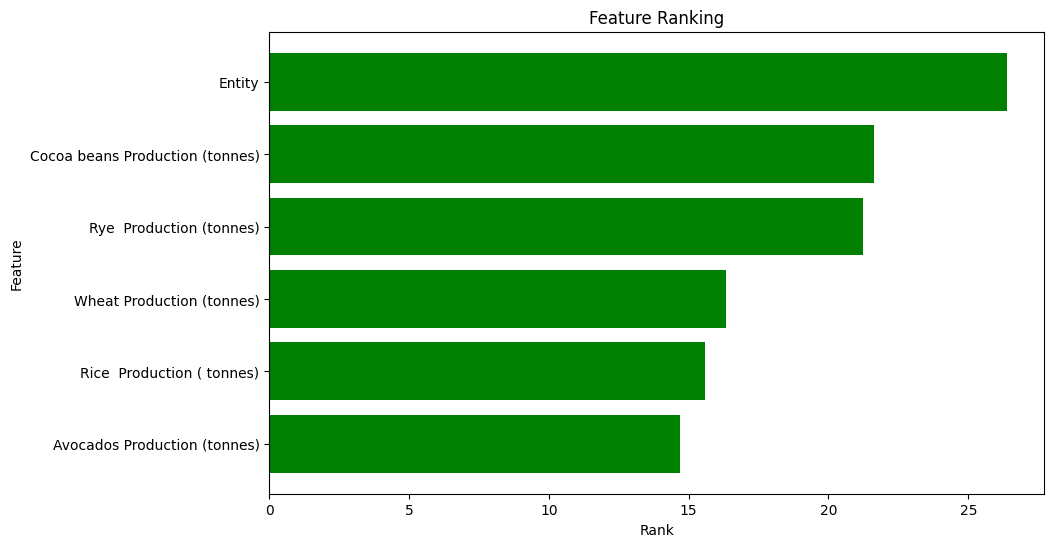

In [383]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k=6)

selected_features = x_train.columns[selected_indices]

feature_ranks_df = pd.DataFrame({'Feature': selected_features, 'Rank': selected_ranks})
feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='Green')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()


###**Tuning Hyperparameter**

In [388]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}


gnb = GaussianNB()

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

print("Jumlah baris x_train_norm:", x_train_norm.shape[0])
print("Jumlah baris y_train:", y_train.shape[0])

print("Akurasi sebelum tuning:", acc_before_tuning)

print("Akurasi setelah tuning:", acc_after_tuning)


Jumlah baris x_train_norm: 8338
Jumlah baris y_train: 9529
Akurasi sebelum tuning: 0.013710128707330722
Akurasi setelah tuning: 0.013710128707330722


In [389]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

gnb = GaussianNB()


param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)
# Cetak hasil akurasi
print("Akurasi sebelum tuning:", acc_before_tuning)
print("Akurasi setelah tuning:", acc_after_tuning)


Akurasi sebelum tuning: 0.013710128707330722
Akurasi setelah tuning: 0.013710128707330722


In [334]:
gnb = GaussianNB(var_smoothing=0.006579332246575682 )
